# Task 2 - Landsat 8 false color image

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/mariamkg00/eds-220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a false color image showing the fire scar of the Thomas fire in 2017. 
Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

## About the data

In this task you will use two datsets:

**First dataset**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

-[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

-[How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

## File management
All your data files must be  inside a directory named 'data' **in your gitignore**. 

## Data access
All data is in the Canvas-week7-homework zip file.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

In [13]:
### ===== FINAL CODE =====

## Import libraries and functions

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rioxr
import pandas as pd

import geopandas as gpd
from shapely.geometry import Polygon

## Import data

In [15]:
# importing the landsat netCDF file

landsat_sb_fp = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')

landsat_sb = rioxr.open_rasterio(landsat_sb_fp)

# importing CA shapefile
ca = gpd.read_file(os.path.join('data','California_Fire_Perimeter','California_Fire_Perimeters_2017.shp'))


## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

In [16]:
# ------exploring landsat file-------

# exploring the netcdf file
type(landsat_sb) 

print(type(landsat_sb.values))
landsat_sb.values


# ------- exploring CA wildfire data ------

print(ca.head(2))
print('crs:' ,ca.crs)
ca.shape
# This geodataframe has 608 rows and 23 columns. 

<class 'method'>
   index  OBJECTID YEAR_ STATE AGENCY UNIT_ID FIRE_NAME   INC_NUM  ALARM_DATE  \
0  19836     41429  2017    CA    CCO     VNC     BROOK  00042450  2017-05-23   
1  19837     41430  2017    CA    CCO     VNC   PACIFIC  00075307  2017-09-09   

    CONT_DATE  ...  GIS_ACRES  \
0  2017-05-24  ...  10.043819   
1  2017-09-09  ...   1.190109   

                                            COMMENTS  COMPLEX_NA  COMPLEX_IN  \
0                                   per walked track        None        None   
1  Final Walked track.  Small spot to the north east        None        None   

  IRWINID FIRE_NUM DECADES   SHAPE_Leng    SHAPE_Area  \
0    None     None    2010  1246.055781  59473.666651   
1    None     None    2010   561.418202   7081.369481   

                                            geometry  
0  POLYGON ((-13229812.974 4046876.486, -13229786...  
1  POLYGON ((-13286872.985 4074523.355, -13286895...  

[2 rows x 23 columns]
crs: epsg:3857


(608, 23)

## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [19]:
# dropping band and using squeeze
landsat_sb = landsat_sb.squeeze()

# dropping band dimension
landsat_sb = landsat_sb.drop('band')

In [21]:
landsat_sb

<xarray.Dataset>
Dimensions:      (y: 731, x: 870)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0
Data variables:
    red          (y, x) float64 ...
    green        (y, x) float64 ...
    blue         (y, x) float64 ...
    nir08        (y, x) float64 ...
    swir22       (y, x) float64 ...

In [31]:
# finding the number of variables in landsat_sb
len(landsat_sb)

5

## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


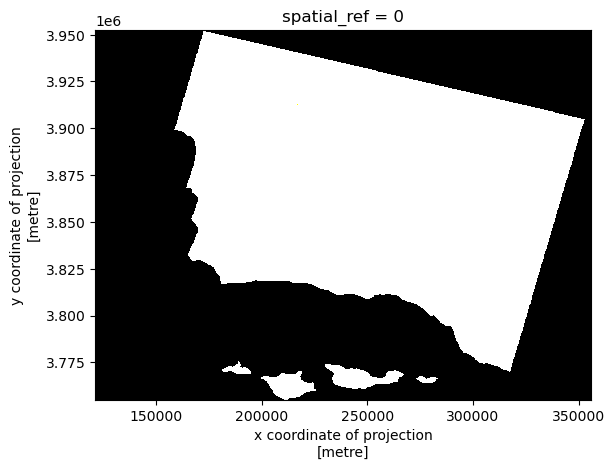

In [48]:
# selecting red, green, and blue variables

# selecting variables whose band colors are red, green, and blue,
# converting to a numpy array and plotting it to make an image 

landsat_sb[['red','green','blue']].to_array().plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

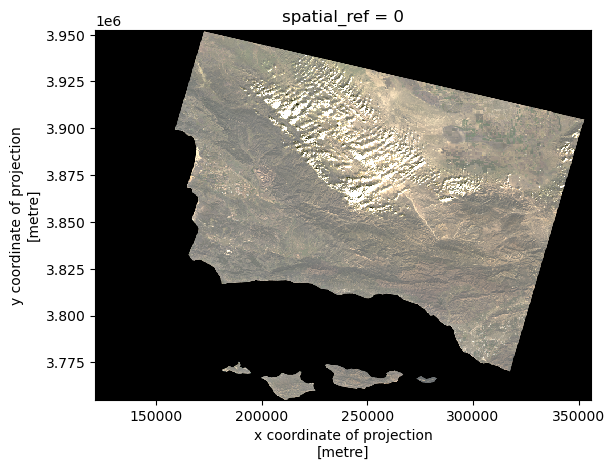

In [49]:
# fixing RGB values within the plot

landsat_sb[['red','green','blue']].to_array().plot.imshow(robust = True)

## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

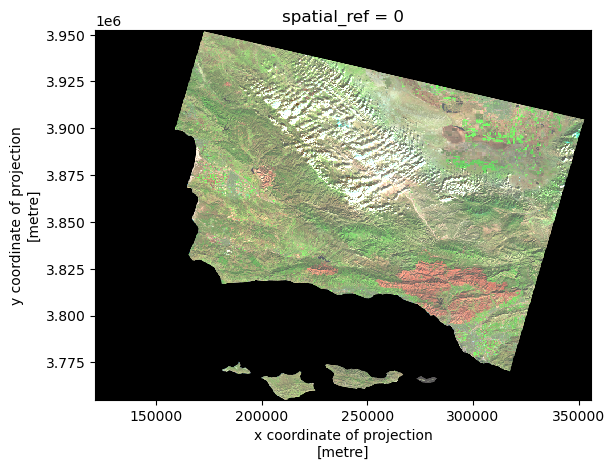

In [50]:
# making the false color image 
landsat_sb[['swir22','nir08','red']].to_array().plot.imshow(robust = True)

## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [55]:
# checking crs for fire data
ca.crs == landsat_sb.rio.crs


# the CRS's don't match, will change accordingly. 

ca = ca.to_crs('epsg:32611')

In [56]:
# double checking to see if crs changes were made 
ca.crs == landsat_sb.rio.crs

True

In [58]:
# make column names small caps
ca.columns = ca.columns.str.lower()

In [66]:
# previewing to make sure column names were changed
ca

# selecting fire_name row for Thomas

thomas_ca =ca[ca['fire_name'] == 'THOMAS'] 

# dissolving geometries 
thomas_ca = thomas_ca[['fire_name','geometry']].dissolve(by='fire_name', as_index=False)

## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

<AxesSubplot:title={'center':'spatial_ref = 0'}, xlabel='x coordinate of projection\n[metre]', ylabel='y coordinate of projection\n[metre]'>

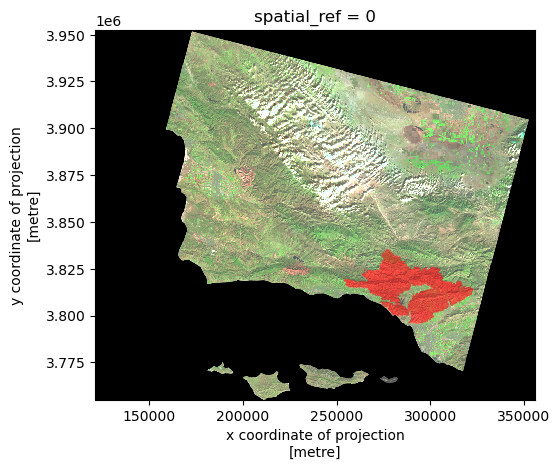

In [72]:
# making the map with both Thomas Fire perimeter and false color imagery
fig, ax = plt.subplots()
landsat_sb[['swir22','nir08','red']].to_array().plot.imshow(robust = True)
thomas_ca.plot(ax=ax, color = 'red', alpha = 0.5)

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the plot you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.